In [41]:
import pandas as pd
import texthero as hero
import matplotlib.pyplot as plt
import seaborn as sns
from texthero import preprocessing
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



In [42]:
# Chargement du jeu de données
data= pd.read_csv("../data/Emotion_final.csv")                                                                                                                                                                                                          

In [43]:
data

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [45]:
data["Emotion"].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [46]:
data.isna().sum()

Text       0
Emotion    0
dtype: int64

In [47]:
# Répartition des textes par émotions
emotion_counts = data['Emotion'].value_counts()
emotion_counts

Emotion
happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

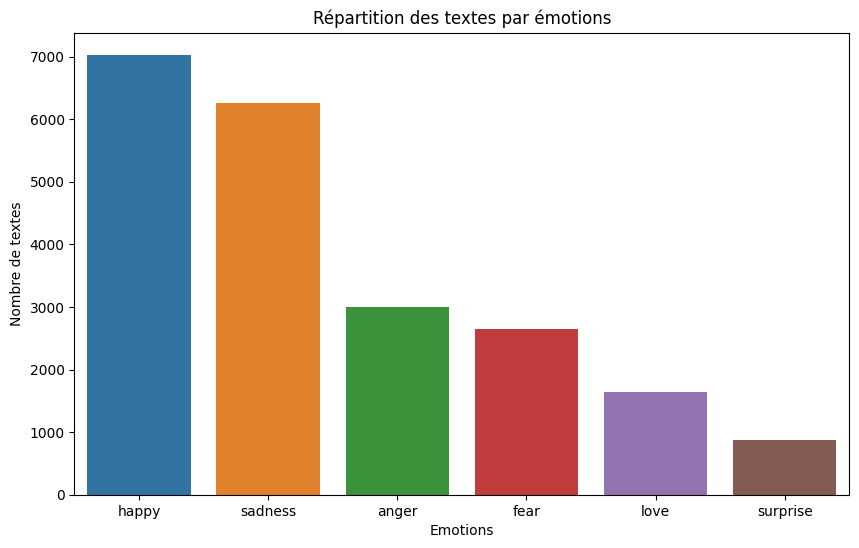

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.xlabel('Emotions')
plt.ylabel('Nombre de textes')
plt.title('Répartition des textes par émotions')
plt.show()

In [49]:
# Prétraitement des données
custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_urls,
                   preprocessing.remove_digits,
                   preprocessing.remove_brackets,
                   preprocessing.remove_angle_brackets,
                   preprocessing.remove_curly_brackets,
                   preprocessing.remove_square_brackets,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_round_brackets,
                   preprocessing.remove_html_tags,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_stopwords]



data['clean_text'] = hero.clean(data['Text'], pipeline=custom_pipeline)


In [50]:
data

,Text,Emotion,clean_text
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful ar...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know ...
4,i am feeling grouchy,anger,feeling grouchy
...,...,...,...
21454,Melissa stared at her friend in dism,fear,melissa stared friend dism
21455,Successive state elections have seen the gover...,fear,successive state elections seen governing pa...
21456,Vincent was irritated but not dismay,fear,vincent irritated dismay
21457,Kendall-Hume turned back to face the dismayed ...,fear,kendall hume turned back face dismayed coup


In [51]:
# import nltk
# from nltk.corpus import stopwords

# # Ajouter des stopwords manuellement
# custom_stopwords = ['feeling', 'one', 'something', 'get','ive','back','day','know','time','way','thing','life']

# # Charger la liste de stopwords par défaut de NLTK
# nltk.download('stopwords')
# stopwords_list = stopwords.words('english')

# # Ajouter les stopwords personnalisés à la liste de stopwords
# stopwords_list.extend(custom_stopwords)

# # Utiliser la liste de stopwords mise à jour dans votre analyse de texte
# filtered_words = [word for word in words if word not in stopwords_list]
# filtered_words


In [52]:
# Extraction des mots les plus courants pour chaque sentiment
top_words_by_emotion = {}
for emotion in data['Emotion'].unique():
    mask = data['Emotion'] == emotion
    text = data[mask]['clean_text']
    words = ' '.join(text).split()
    word_freq = FreqDist(words)
    top_words = [word for word, freq in word_freq.most_common(30) if word not in stopwords.words('english')]
    top_words_by_emotion[emotion] = top_words


In [53]:
# Affichage des 30 mots les plus courants pour chaque sentiment
for emotion, words in top_words_by_emotion.items():
    print(f"Emotion: {emotion}")
    print(words)
    print()

Emotion: sadness
['feel', 'feeling', 'like', 'im', 'really', 'know', 'get', 'would', 'time', 'little', 'ive', 'still', 'even', 'want', 'one', 'life', 'people', 'think', 'bit', 'things', 'much', 'dont', 'make', 'day', 'something', 'back', 'going', 'way', 'could', 'pretty']

Emotion: anger
['feel', 'feeling', 'like', 'im', 'really', 'get', 'people', 'know', 'time', 'little', 'want', 'even', 'would', 'angry', 'think', 'one', 'could', 'things', 'bit', 'way', 'offended', 'dont', 'resentful', 'cold', 'still', 'something', 'irritable', 'cant', 'going', 'bothered']

Emotion: love
['feel', 'feeling', 'like', 'im', 'love', 'really', 'know', 'sweet', 'loving', 'time', 'want', 'people', 'caring', 'passionate', 'one', 'sympathetic', 'life', 'liked', 'get', 'hot', 'little', 'feelings', 'tender', 'lovely', 'longing', 'loved', 'would', 'need', 'accepted', 'nostalgic']

Emotion: surprise
['feel', 'feeling', 'like', 'im', 'amazed', 'impressed', 'curious', 'overwhelmed', 'funny', 'surprised', 'weird', 's

In [63]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# stopwords_list = ['feeling','feel','people','im','going', 'one', 'something', 'get','ive','back','day','know','time','way','thing','even','cant']
stopwords_list = ['feel','feeling','feelings','like','im','ive','know','get','would','time','little','even','one','life','people','think','bit','things','much','dont','make','going']

# Initialiser le lemmatiseur WordNet
lemmatizer = WordNetLemmatizer()

# Supprimer les mots qui se ressemblent et garder la racine
for emotion, words in top_words_by_emotion.items():
    print(f"Emotion: {emotion}")
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_list]
    unique_words = set(lemmatized_words)
    print(unique_words)
    print()


Emotion: sadness
{'back', 'day', 'really', 'could', 'something', 'way', 'pretty', 'want', 'still'}

Emotion: anger
{'cold', 'resentful', 'really', 'could', 'bothered', 'irritable', 'cant', 'way', 'something', 'offended', 'want', 'angry', 'still'}

Emotion: love
{'tender', 'longing', 'liked', 'accepted', 'need', 'nostalgic', 'love', 'loved', 'really', 'lovely', 'sympathetic', 'sweet', 'hot', 'passionate', 'caring', 'want', 'loving'}

Emotion: surprise
{'dazed', 'curious', 'surprised', 'funny', 'amazed', 'amazing', 'really', 'stunned', 'feel', 'could', 'weird', 'overwhelmed', 'strange', 'impressed', 'shocked', 'still'}

Emotion: fear
{'frightened', 'afraid', 'really', 'agitated', 'terrified', 'nervous', 'go', 'scared', 'weird', 'anxious', 'strange', 'want', 'still'}

Emotion: happy
{'love', 'day', 'really', 'could', 'happy', 'well', 'something', 'pretty', 'want', 'good', 'still'}



[nltk_data] Downloading package wordnet to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
top_words_by_emotion


{'sadness': ['feel',
  'feeling',
  'like',
  'im',
  'really',
  'know',
  'get',
  'would',
  'time',
  'little',
  'ive',
  'still',
  'even',
  'want',
  'one',
  'life',
  'people',
  'think',
  'bit',
  'things',
  'much',
  'dont',
  'make',
  'day',
  'something',
  'back',
  'going',
  'way',
  'could',
  'pretty'],
 'anger': ['feel',
  'feeling',
  'like',
  'im',
  'really',
  'get',
  'people',
  'know',
  'time',
  'little',
  'want',
  'even',
  'would',
  'angry',
  'think',
  'one',
  'could',
  'things',
  'bit',
  'way',
  'offended',
  'dont',
  'resentful',
  'cold',
  'still',
  'something',
  'irritable',
  'cant',
  'going',
  'bothered'],
 'love': ['feel',
  'feeling',
  'like',
  'im',
  'love',
  'really',
  'know',
  'sweet',
  'loving',
  'time',
  'want',
  'people',
  'caring',
  'passionate',
  'one',
  'sympathetic',
  'life',
  'liked',
  'get',
  'hot',
  'little',
  'feelings',
  'tender',
  'lovely',
  'longing',
  'loved',
  'would',
  'need',
  'ac

In [56]:
# all_words = ' '.join(top).split()
# len(all_words)

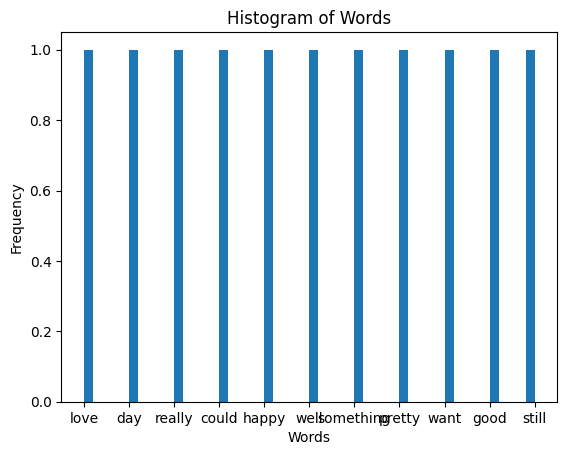

In [65]:
plt.hist(unique_words, bins=50)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Histogram of Words')
plt.show()


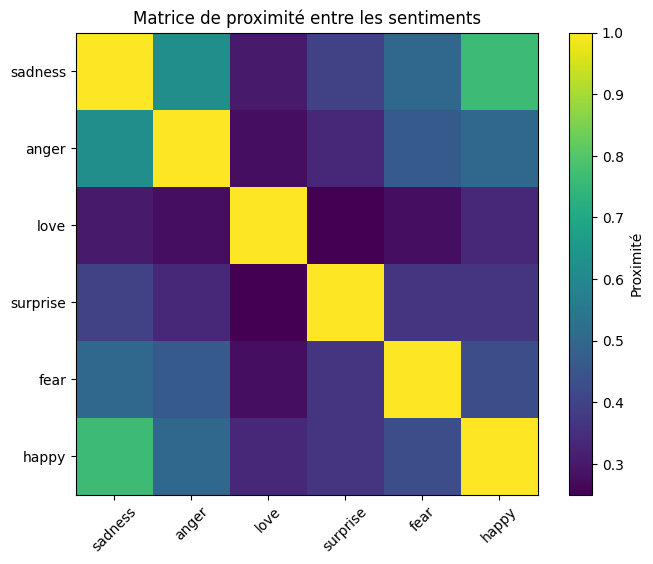

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Créer une matrice vide pour stocker la proximité entre les sentiments
proximity_matrix = np.zeros((len(top_words_by_emotion), len(top_words_by_emotion)))

# Calculer la proximité entre les sentiments
for i, (emotion1, top_words1) in enumerate(top_words_by_emotion.items()):
    for j, (emotion2, top_words2) in enumerate(top_words_by_emotion.items()):
        # Calculer le nombre de mots en commun entre les deux sentiments
        common_words = set(top_words1) & set(top_words2)
        
        # Stocker la proximité normalisée entre les sentiments dans la matrice
        proximity_matrix[i, j] = len(common_words) / len(set(top_words1) | set(top_words2))
        # Remark : En divisant le nombre de mots en commun par le nombre total de mots distincts, nous obtenons une valeur de proximité normalisée entre 0 et 1. 
        # Plus cette valeur est proche de 1, plus les sentiments sont similaires en termes de mots les plus courants.

# Afficher la matrice de proximité sous forme de heatmap
plt.figure(figsize=(8, 6))
plt.imshow(proximity_matrix, cmap='viridis')
plt.xticks(np.arange(len(top_words_by_emotion)), top_words_by_emotion.keys(), rotation=45)
plt.yticks(np.arange(len(top_words_by_emotion)), top_words_by_emotion.keys())
plt.colorbar(label='Proximité')
plt.title('Matrice de proximité entre les sentiments')
plt.show()

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['Emotion'], test_size=0.2, random_state=42)

# Créer le modèle Bag of Words (BoW)
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Entraîner et évaluer le modèle BoW avec une régression logistique
bow_model = LogisticRegression()
bow_model.fit(X_train_bow, y_train)
bow_predictions = bow_model.predict(X_test_bow)

print("Rapport de classification pour le modèle BoW :")
print(classification_report(y_test, bow_predictions))
print()

# Créer le modèle TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entraîner et évaluer le modèle TF-IDF avec une régression logistique
tfidf_model = LogisticRegression()
tfidf_model.fit(X_train_tfidf, y_train)
tfidf_predictions = tfidf_model.predict(X_test_tfidf)

print("Rapport de classification pour le modèle TF-IDF :")
print(classification_report(y_test, tfidf_predictions))


/home/apprenant/miniconda3/envs/nlp_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Rapport de classification pour le modèle BoW :
              precision    recall  f1-score   support

       anger       0.91      0.86      0.88       617
        fear       0.87      0.85      0.86       531
       happy       0.91      0.94      0.92      1381
        love       0.82      0.78      0.80       318
     sadness       0.92      0.94      0.93      1277
    surprise       0.78      0.72      0.75       168

    accuracy                           0.89      4292
   macro avg       0.87      0.85      0.86      4292
weighted avg       0.89      0.89      0.89      4292


Rapport de classification pour le modèle TF-IDF :
              precision    recall  f1-score   support

       anger       0.92      0.80      0.86       617
        fear       0.87      0.79      0.83       531
       happy       0.85      0.96      0.90      1381
        love       0.90      0.66      0.76       318
     sadness       0.89      0.95      0.92      1277
    surprise       0.86      0.55 

/home/apprenant/miniconda3/envs/nlp_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
